**This is the file regarding Exploratory Data Analysis in order to gain good understanding about the dataset in this project and as a step before implementing features selection and modelling.**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('cleaned_train.csv')
df_train.head()

,id,budget,homepage,original_language,original_title,overview,release_date,revenue,runtime,status,...,History,Horror,Music,Mystery,Romance,Science.Fiction,Thriller,TV.Movie,War,Western
0,1004,25000000.0,NaN,en,Lonesome Jim,"Failing to make it on his own, 27-year-old Jim...",2005-11-16,38565909.0,91.0,Released,...,0,0,0,0,1,0,0,0,0,0
1,623,15000000.0,NaN,en,eXistenZ,A game designer on the run from assassins must...,1999-04-14,2856712.0,97.0,Released,...,0,1,0,0,0,1,1,0,0,0
2,2693,70000000.0,http://www.couplesretreatmovie.com/,en,Couples Retreat,"Four couples, all friends, descend on a tropic...",2009-09-19,171844840.0,113.0,Released,...,0,0,0,0,1,0,0,0,0,0
3,934,60000000.0,NaN,en,The Sentinel,A secret service agent is framed as the mole i...,2006-04-19,77920346.0,108.0,Released,...,0,0,0,0,0,0,1,0,0,0
4,4496,60000000.0,https://www.facebook.com/LondonHasFallenOfficial,en,London Has Fallen,"In London for the Prime Minister's funeral, Mi...",2016-03-02,205754447.0,99.0,Released,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2386 non-null   int64  
 1   budget             2386 non-null   float64
 2   homepage           857 non-null    object 
 3   original_language  2386 non-null   object 
 4   original_title     2386 non-null   object 
 5   overview           2386 non-null   object 
 6   release_date       2386 non-null   object 
 7   revenue            2386 non-null   float64
 8   runtime            2386 non-null   float64
 9   status             2386 non-null   object 
 10  tagline            1965 non-null   object 
 11  title              2386 non-null   object 
 12  vote_average       2386 non-null   float64
 13  vote_count         2386 non-null   float64
 14  Action             2386 non-null   int64  
 15  Adventure          2386 non-null   int64  
 16  Animation          2386 

In [ ]:
df_test=pd.read_csv('cleaned_test.csv')
df_test.head()

,id,budget,homepage,original_language,original_title,overview,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,1,4000000.0,NaN,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1995-12-09,4300000.0,98.0,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,530.0
1,3,94000000.0,http://movies.disney.com/finding-nemo,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",2003-05-30,940335536.0,100.0,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,6122.0
2,5,15000000.0,http://www.dreamworks.com/ab/,en,American Beauty,"Lester Burnham, a depressed suburban father in...",1999-09-15,356296601.0,122.0,Released,Look closer.,American Beauty,7.9,3313.0
3,6,12800000.0,NaN,en,Dancer in the Dark,"Selma, a Czech immigrant on the verge of blind...",2000-05-17,40031879.0,140.0,Released,You don't need eyes to see.,Dancer in the Dark,7.6,377.0
4,8,92620000.0,NaN,de,Metropolis,In a futuristic city sharply divided between t...,1927-01-10,650422.0,153.0,Released,There can be no understanding between the hand...,Metropolis,8.0,657.0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2385 non-null   int64  
 1   budget             2385 non-null   float64
 2   homepage           850 non-null    object 
 3   original_language  2385 non-null   object 
 4   original_title     2385 non-null   object 
 5   overview           2385 non-null   object 
 6   release_date       2385 non-null   object 
 7   revenue            2385 non-null   float64
 8   runtime            2385 non-null   float64
 9   status             2385 non-null   object 
 10  tagline            1991 non-null   object 
 11  title              2385 non-null   object 
 12  vote_average       2385 non-null   float64
 13  vote_count         2385 non-null   float64
dtypes: float64(5), int64(1), object(8)
memory usage: 261.0+ KB


# EDA (Exploratory Data Analysis)

## 1. Number of Movies per Genre

In [ ]:
# Categorical Columns Conversion
feature_columns = ['id', 'budget', 'homepage', 'original_language', 'original_title', 'overview', 'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average', 'vote_count']
category_columns = df_train.columns.drop(feature_columns)
for col in category_columns:
    df_train[col] = df_train[col].astype('category')

In [ ]:
# Number of movie per genre
for col in category_columns:
    df_train[col] = df_train[col].astype(int)

df_movies_per_genre = pd.DataFrame({'Genre': category_columns,'Total': df_train[category_columns].apply(sum)})

print(df_movies_per_genre)

                           Genre  Total
Action                    Action    610
Adventure              Adventure    403
Animation              Animation    115
Comedy                    Comedy    902
Crime                      Crime    322
Documentary          Documentary     51
Drama                      Drama   1125
Family                    Family    262
Fantasy                  Fantasy    222
Foreign                  Foreign     21
History                  History     97
Horror                    Horror    263
Music                      Music     90
Mystery                  Mystery    168
Romance                  Romance    428
Science.Fiction  Science.Fiction    299
Thriller                Thriller    608
TV.Movie                TV.Movie      5
War                          War     69
Western                  Western     36


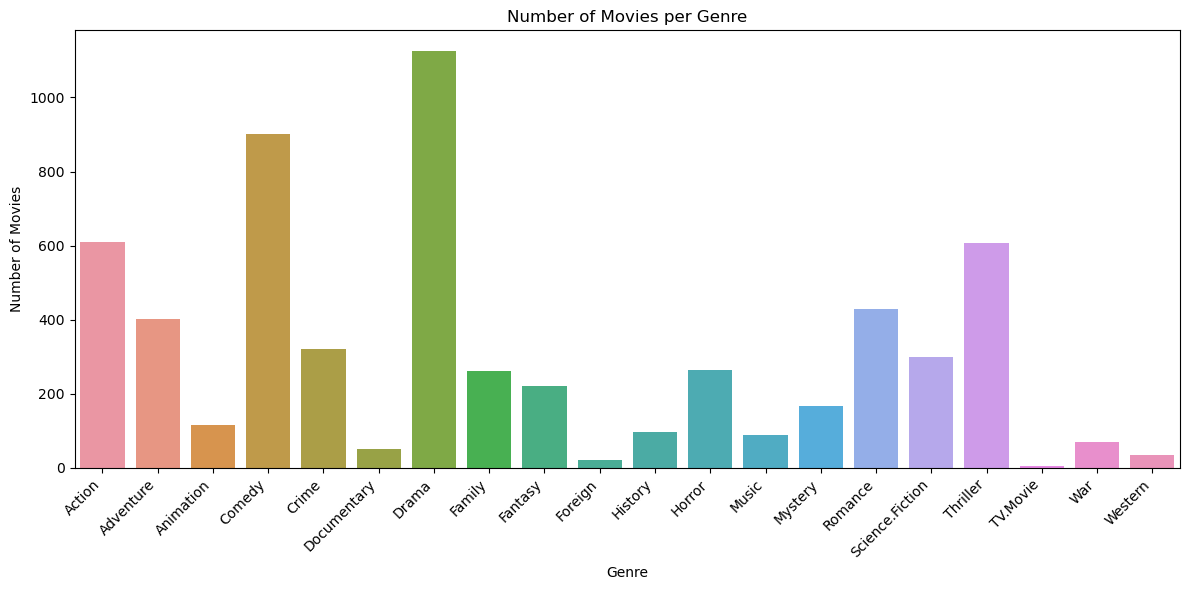

In [ ]:
# show it in histogram
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Total', data=df_movies_per_genre)
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Observations:
* Drama, Action, Comedy and Thriller dominate the movie genre
* The highest genre movie is Drama, the lowest genre movie is TV.Movie

## 2. Number of Genre per Movie

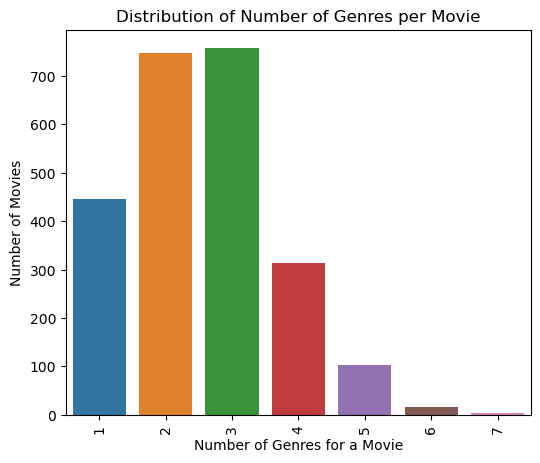

In [ ]:
sum_movie = df_train[category_columns].sum(axis=1)
df_genres_per_movie = pd.DataFrame({'title': df_train['title'], 'num_genres': sum_movie})
genre_counts = df_genres_per_movie.groupby('num_genres').count()['title']

# Histogram
plt.figure(figsize=(6, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xlabel('Number of Genres for a Movie')
plt.ylabel('Number of Movies')
plt.title('Distribution of Number of Genres per Movie')
plt.xticks(rotation=90)
plt.show()

### Observation
Based on the data a movie can be classified into seven genre, but on average, most of the movie are classified into one to three genres.

## 3. Statistic Check

In [ ]:
df_train.describe()

,id,budget,revenue,runtime,vote_average,vote_count,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science.Fiction,Thriller,TV.Movie,War,Western
count,2386.000000,2.386000e+03,2.386000e+03,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000,...,2386.000000,2386.000000,2386.000000,2386.000000,2386.00000,2386.000000,2386.000000,2386.000000,2386.000000,2386.000000
mean,2401.369656,3.522880e+07,9.745347e+07,107.524728,6.172129,743.755448,0.255658,0.168902,0.048198,0.378039,...,0.040654,0.110226,0.037720,0.070411,0.17938,0.125314,0.254820,0.002096,0.028919,0.015088
std,1376.961716,3.842940e+07,1.611551e+08,19.943101,0.939703,1335.072194,0.436322,0.374744,0.214229,0.484999,...,0.197528,0.313237,0.190558,0.255892,0.38375,0.331144,0.435851,0.045739,0.167613,0.121929
min,2.000000,1.000000e+00,5.000000e+00,42.000000,1.900000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1207.250000,1.200000e+07,3.025792e+07,94.000000,5.600000,59.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2451.000000,2.500000e+07,3.856591e+07,103.500000,6.200000,236.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3591.250000,4.000000e+07,1.008591e+08,117.000000,6.800000,771.750000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
max,4771.000000,3.000000e+08,2.787965e+09,248.000000,10.000000,13752.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observation: This is highly imbalance data since there is a very high gap between the minimum value and the mean value

## 3a. Correlation between Numerical Columns

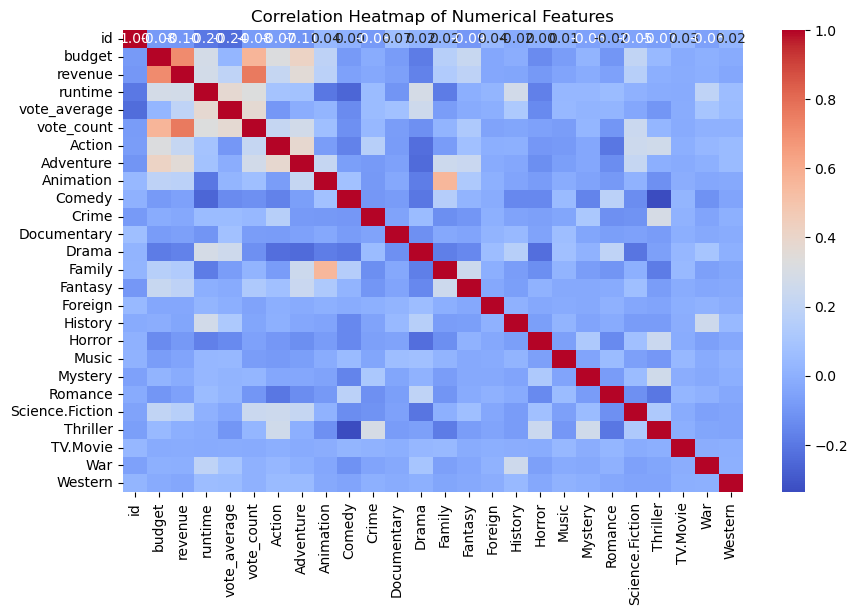

In [ ]:
# Select only numerical columns for correlation
numeric_columns = df_train.select_dtypes(include=[np.number])

# Plot correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



### Observation: STRONG Correlation shown on BUDGET-REVENUE columns and REVENUE-VOTE_COUNT columns

In [ ]:
# Check the shape of the data (rows and columns)
print(f"Training data shape: {df_train.shape}")
print(f"Testing data shape: {df_test.shape}")

# Check data types and null values
print('\nInfo related df_train')
df_train.info()


Training data shape: (100, 5)
Testing data shape: (2385, 14)

Info related df_train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       100 non-null    float64
 1   B       100 non-null    float64
 2   C       100 non-null    float64
 3   D       100 non-null    float64
 4   E       100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


homepage             1529
tagline               421
id                      0
Drama                   0
Family                  0
Fantasy                 0
Foreign                 0
History                 0
Horror                  0
Music                   0
Crime                   0
Mystery                 0
Romance                 0
Science.Fiction         0
Thriller                0
TV.Movie                0
War                     0
Documentary             0
Comedy                  0
budget                  0
Animation               0
Adventure               0
Action                  0
vote_count              0
vote_average            0
title                   0
status                  0
runtime                 0
revenue                 0
release_date            0
overview                0
original_title          0
original_language       0
Western                 0
dtype: int64


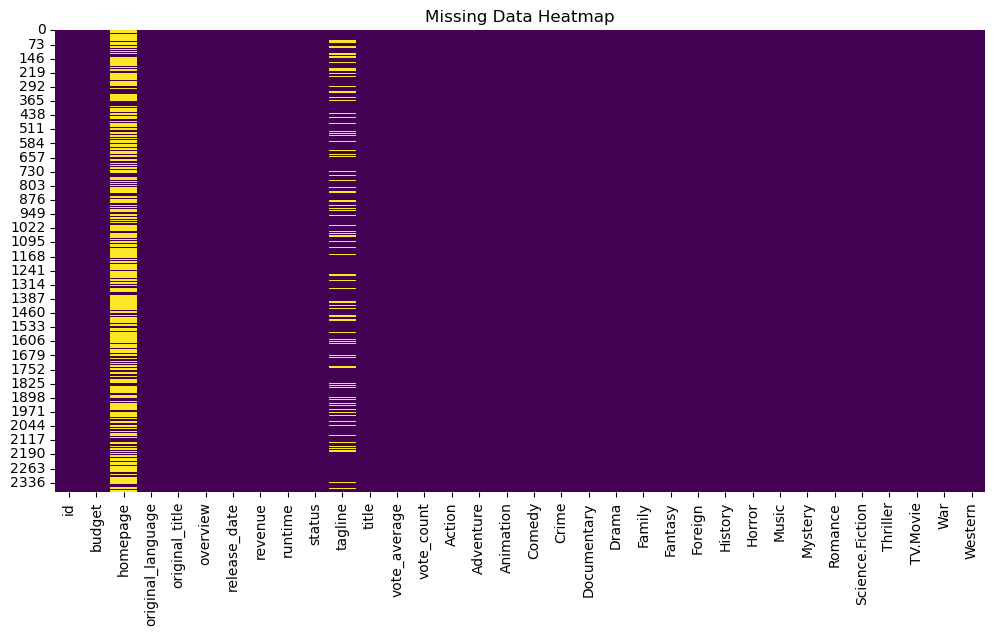

In [ ]:
# Check missing values for each column
missing_data = df_train.isnull().sum().sort_values(ascending=False)
print(missing_data)

# Visualize missing data with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
# Fill missing text columns with empty strings
df_train['homepage'] = df_train['homepage'].fillna('')
df_train['tagline'] = df_train['tagline'].fillna('')


## 3b. Distribution of Numerical Features

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

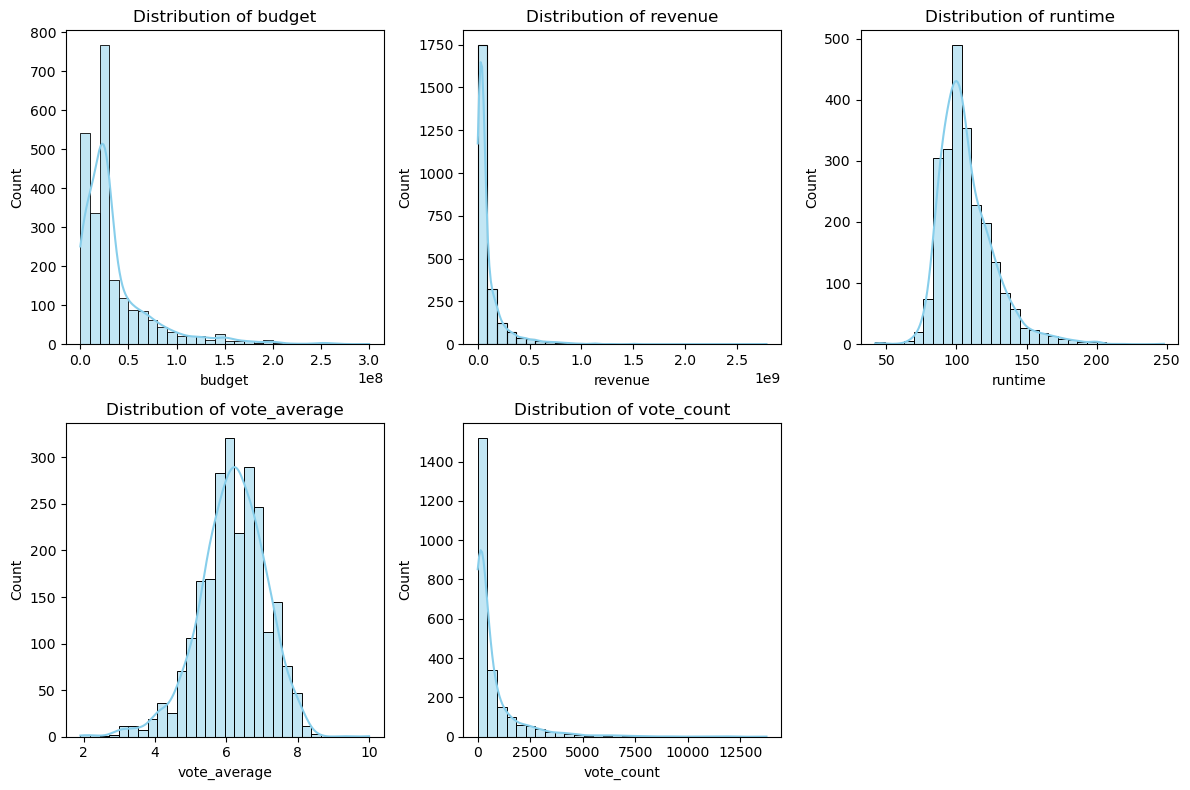

In [ ]:
# Plot the distribution of numerical features
numerical_columns = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_train[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


## 3c. Budget Analysis

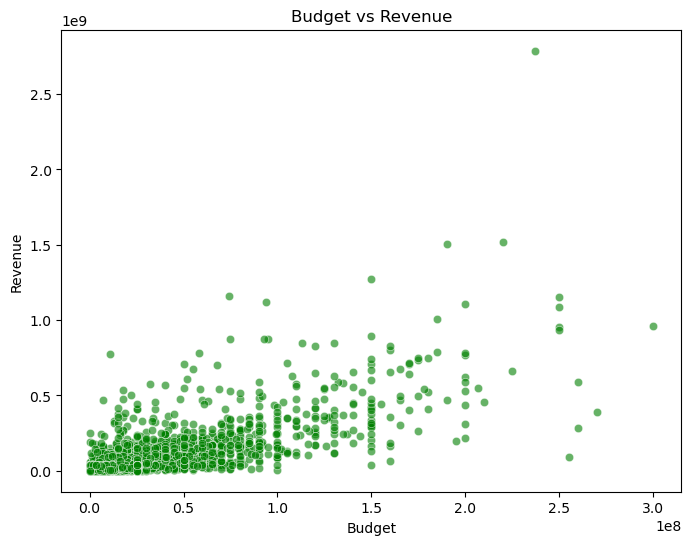

In [ ]:
# Plot budget vs revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df_train, color='green', alpha=0.6)
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()



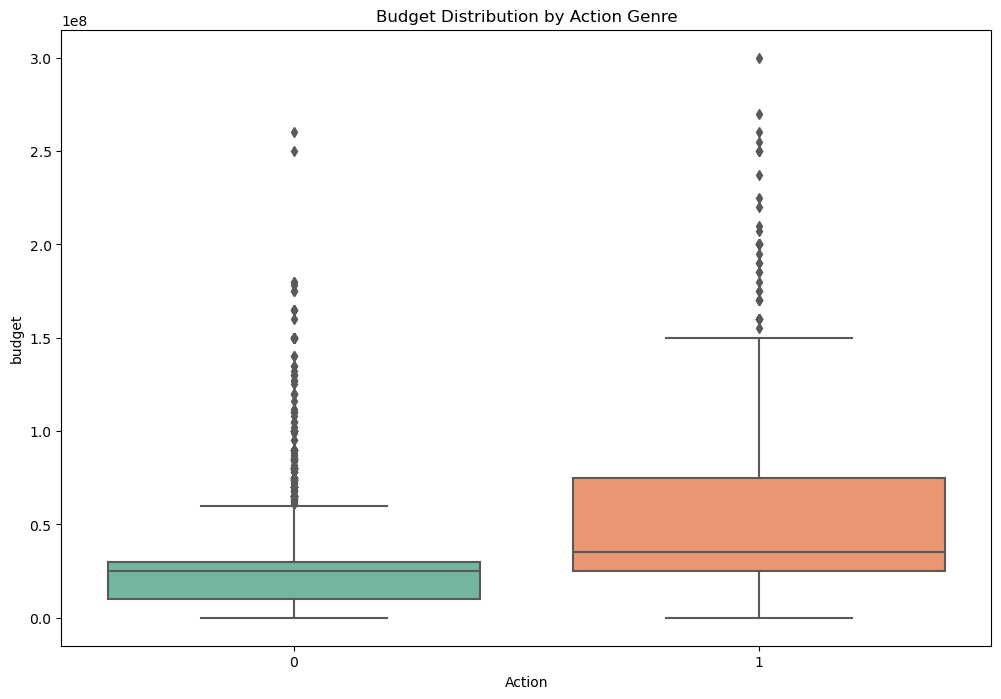

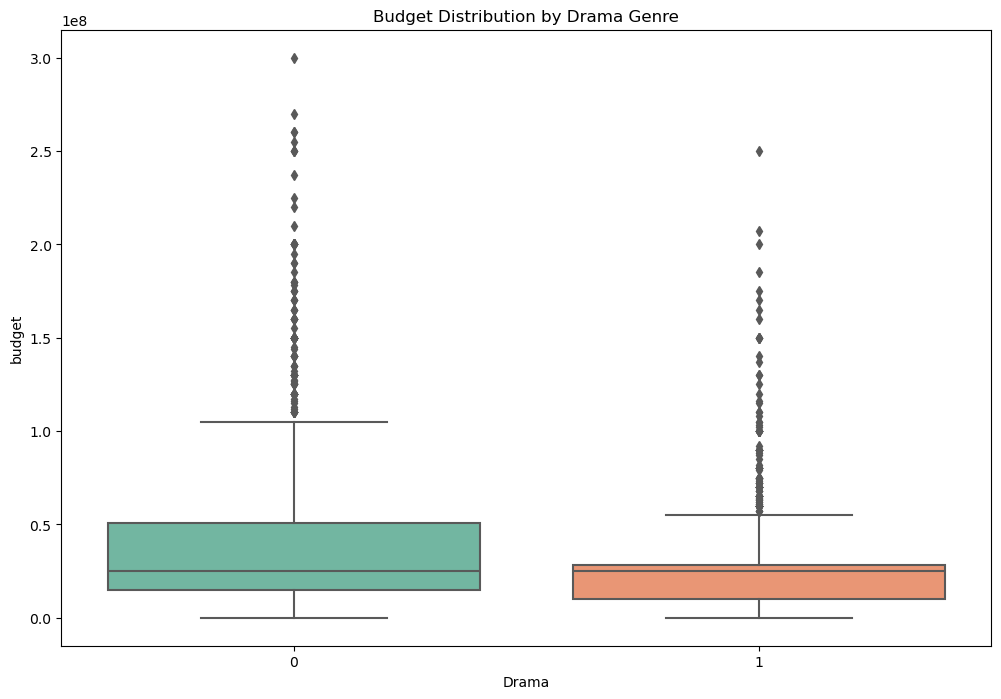

In [ ]:
# Select a few genres and plot budget vs genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Action', y='budget', data=df_train, palette='Set2')
plt.title("Budget Distribution by Action Genre")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Drama', y='budget', data=df_train, palette='Set2')
plt.title("Budget Distribution by Drama Genre")
plt.show()


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

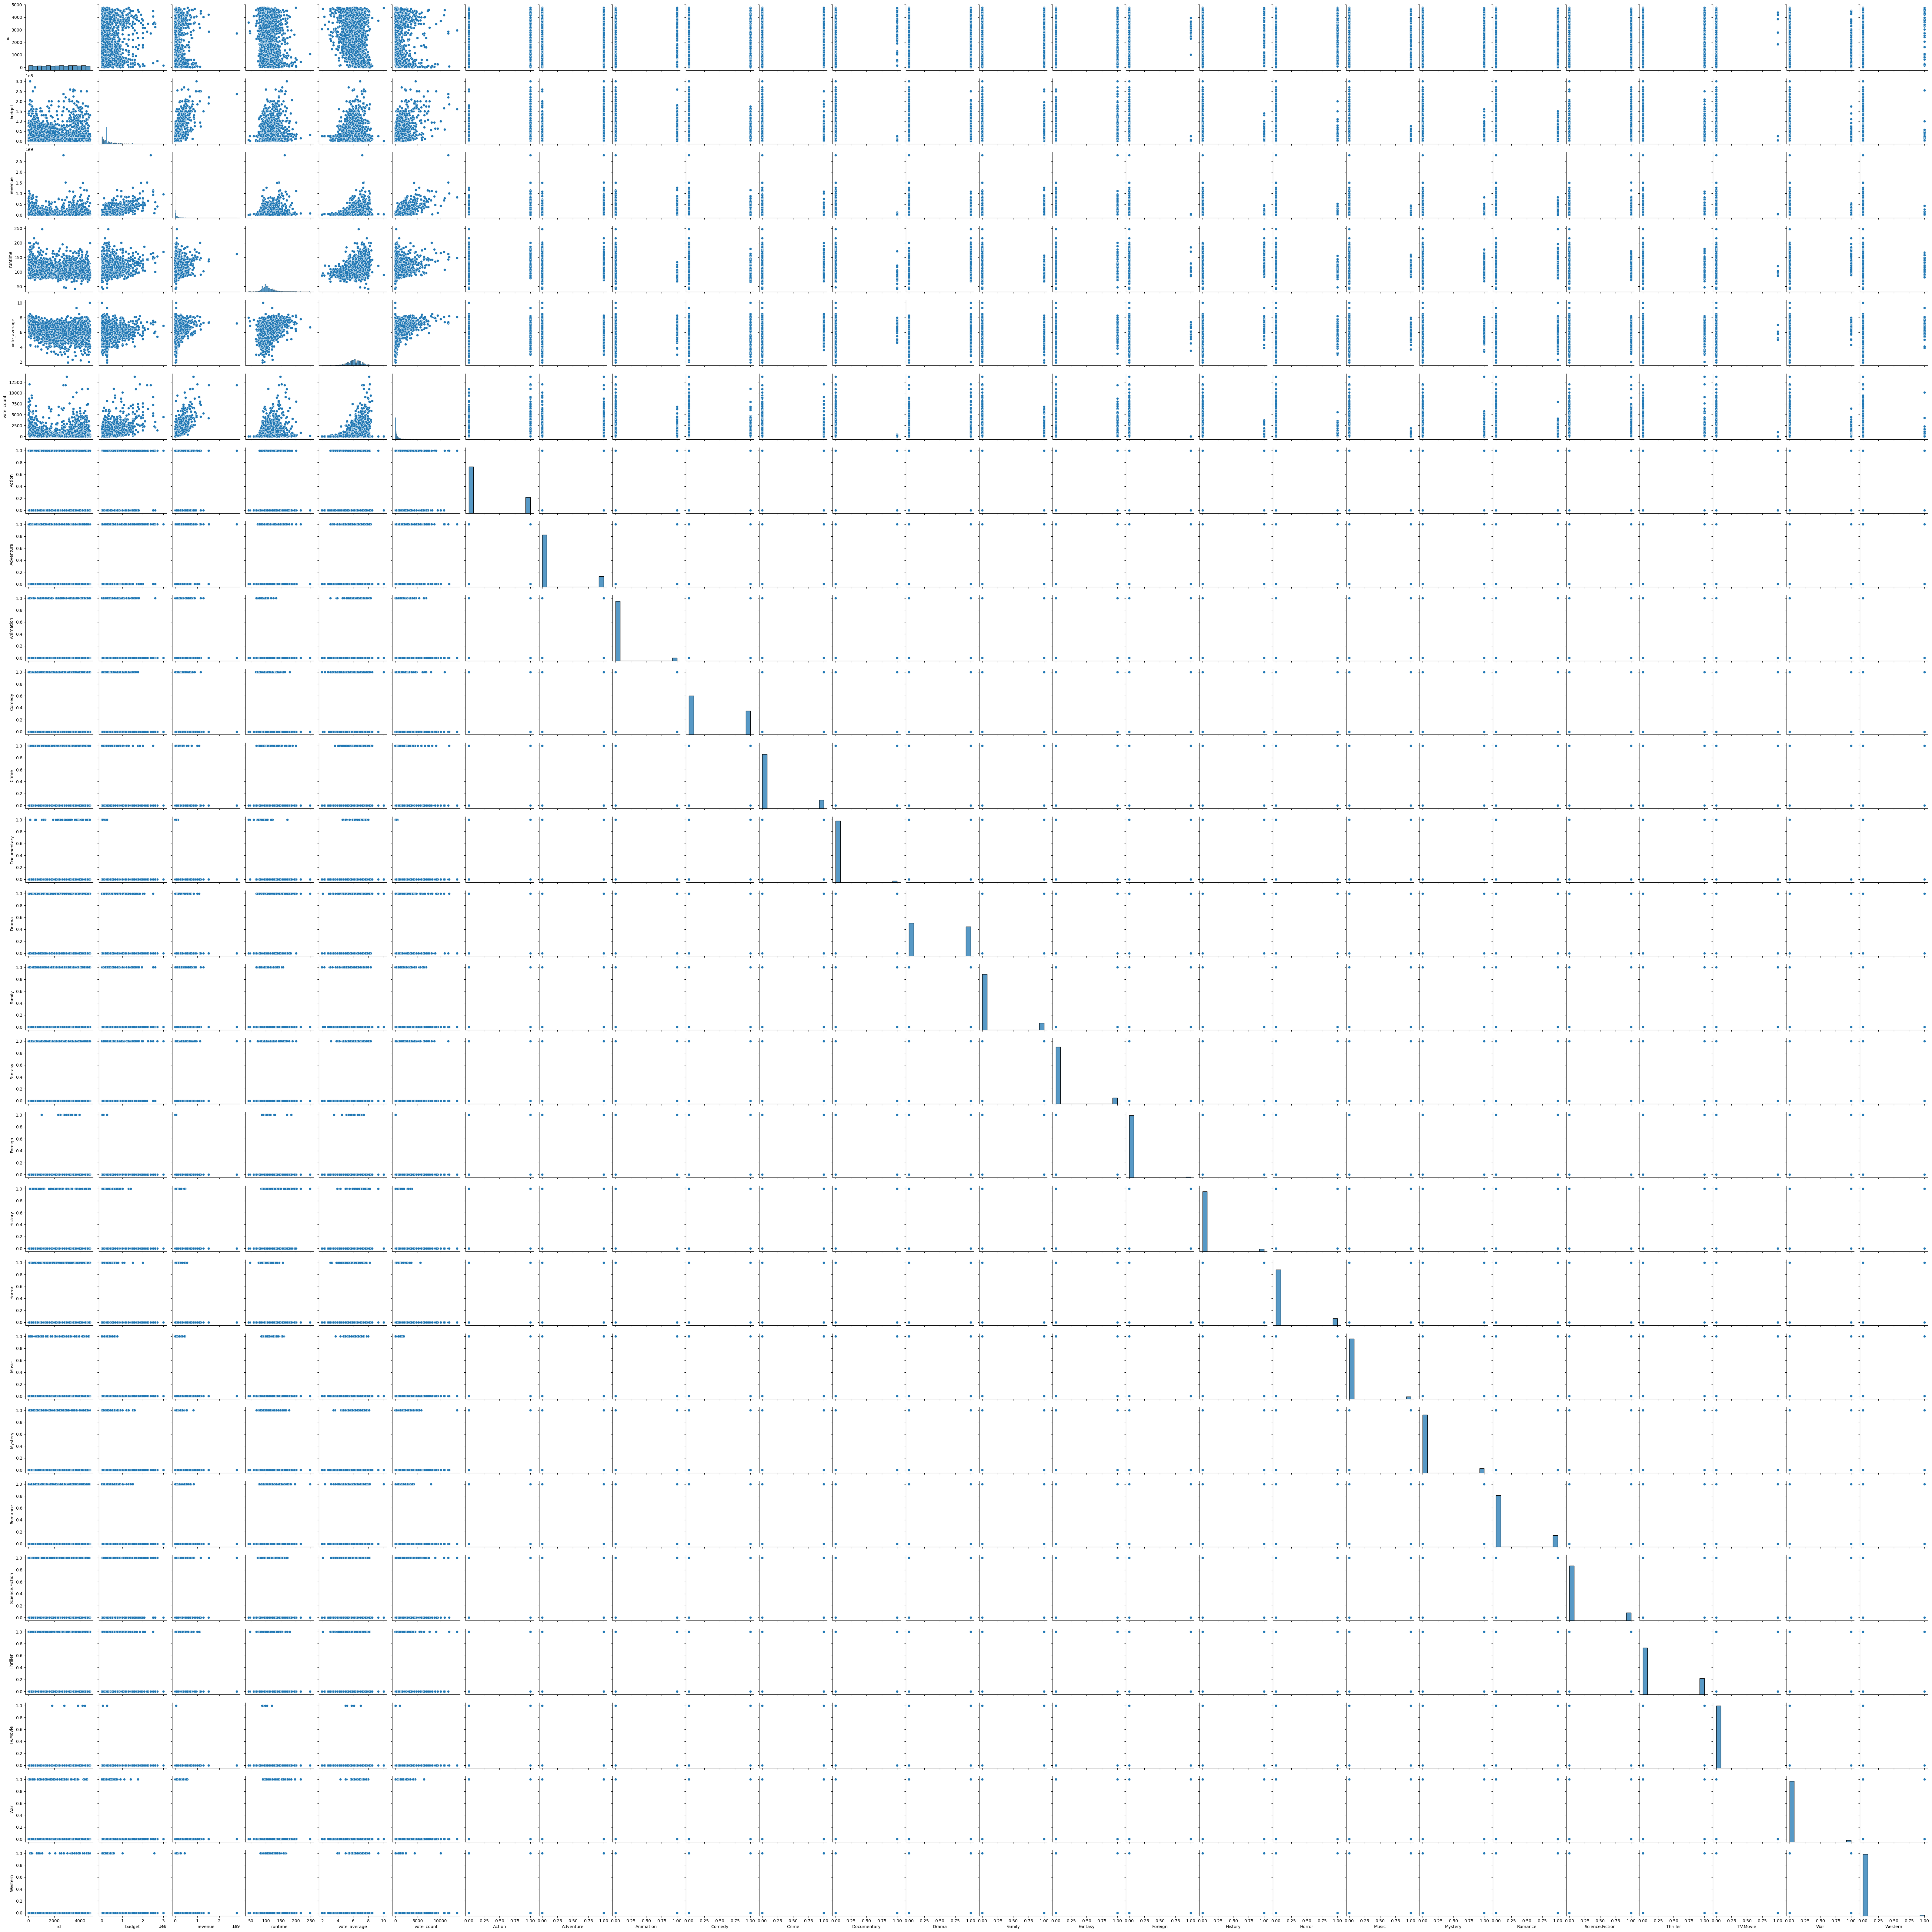

In [ ]:
# Pairwise relationships between numerical features
sns.pairplot(numerical_columns)
plt.show()


## 3d. Revenue Analysis

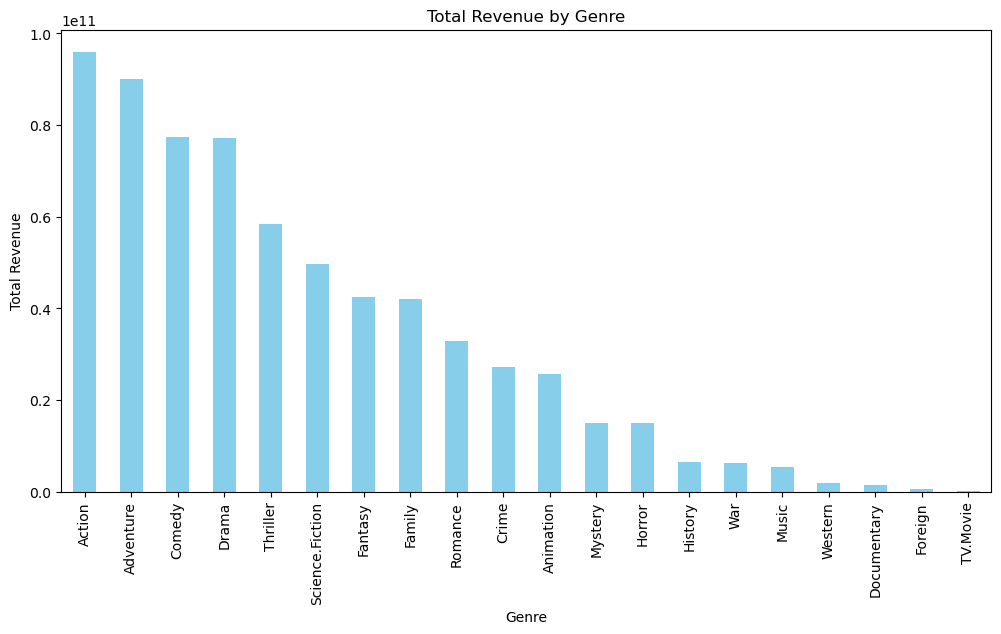

In [ ]:
# Create a list of genre columns
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
    'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science.Fiction', 'Thriller', 'TV.Movie',
    'War', 'Western'
]

# Calculate total revenue for each genre by summing the revenue for movies that belong to that genre
total_revenue_by_genre = {}

for genre in genre_columns:
    # Filter the data to get revenue for movies belonging to the genre
    genre_data = df_train[df_train[genre] == 1]['revenue']

    # Sum the revenue for the genre
    total_revenue_by_genre[genre] = genre_data.sum()

# Convert the dictionary to a pandas Series for easier plotting
total_revenue_by_genre = pd.Series(total_revenue_by_genre)

# Sort genres by total revenue in descending order
total_revenue_by_genre = total_revenue_by_genre.sort_values(ascending=False)

# Plot the total revenue by genre
plt.figure(figsize=(12, 6))
total_revenue_by_genre.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.show()


### Observation:
Genre Action, Adventure, Comedy, Drama and Thriller are the top 5 genres earning highest revenue.

## 3e. Budget_Revenue Analysis by Genre

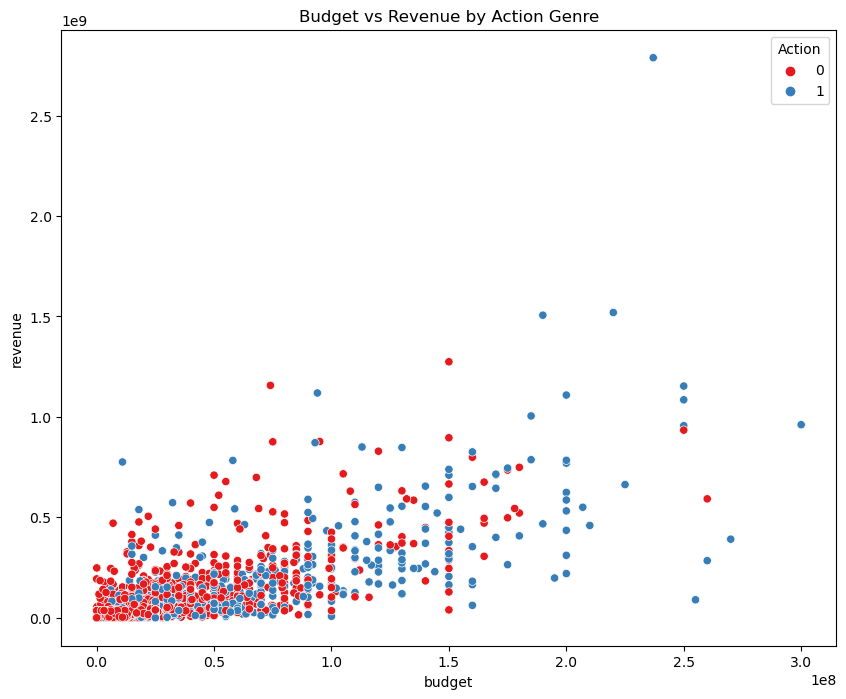

In [ ]:
# Scatter plot of budget vs revenue colored by genre
plt.figure(figsize=(10, 8))
sns.scatterplot(x='budget', y='revenue', hue='Action', data=df_train, palette='Set1')
plt.title("Budget vs Revenue by Action Genre")
plt.show()


## 4. Text Analysis

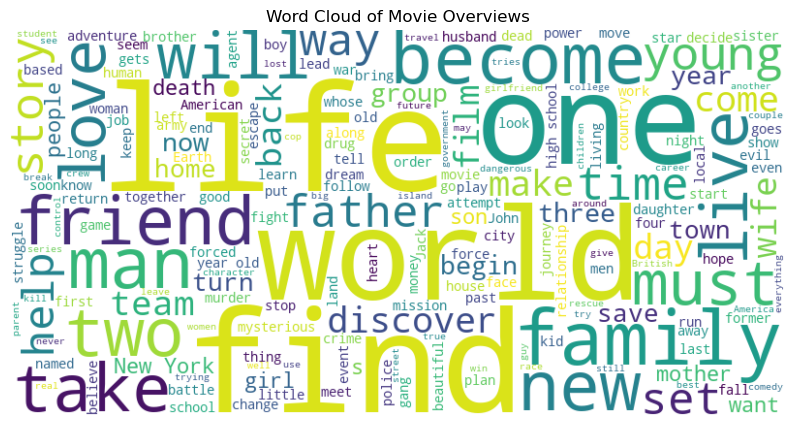

In [ ]:
from wordcloud import WordCloud

# Combine all overviews into one large string
overview_text = " ".join(df_train['overview'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overview_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Overviews")
plt.show()


In [ ]:
# Get the top 10 most frequent words in the title column
title_text = " ".join(df_train['title'].dropna())

# Tokenize the words and count frequencies
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# Tokenize and remove stopwords
tokens = word_tokenize(title_text.lower())
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Count word frequencies
word_freq = Counter(filtered_tokens)

# Get the top 10 most common words
top_10_words = word_freq.most_common(10)

# Display the top 10 words
top_10_words


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('2', 55),
 ('man', 43),
 ('love', 28),
 ('movie', 26),
 ('ii', 20),
 ('good', 19),
 ('dead', 19),
 ('last', 19),
 ('black', 18),
 ('night', 17)]

### Observation: 10 most frequent words are: 2, man, love, movie, ii, good, dead, last, black, night. 17)]


### Top Words in Each Genre

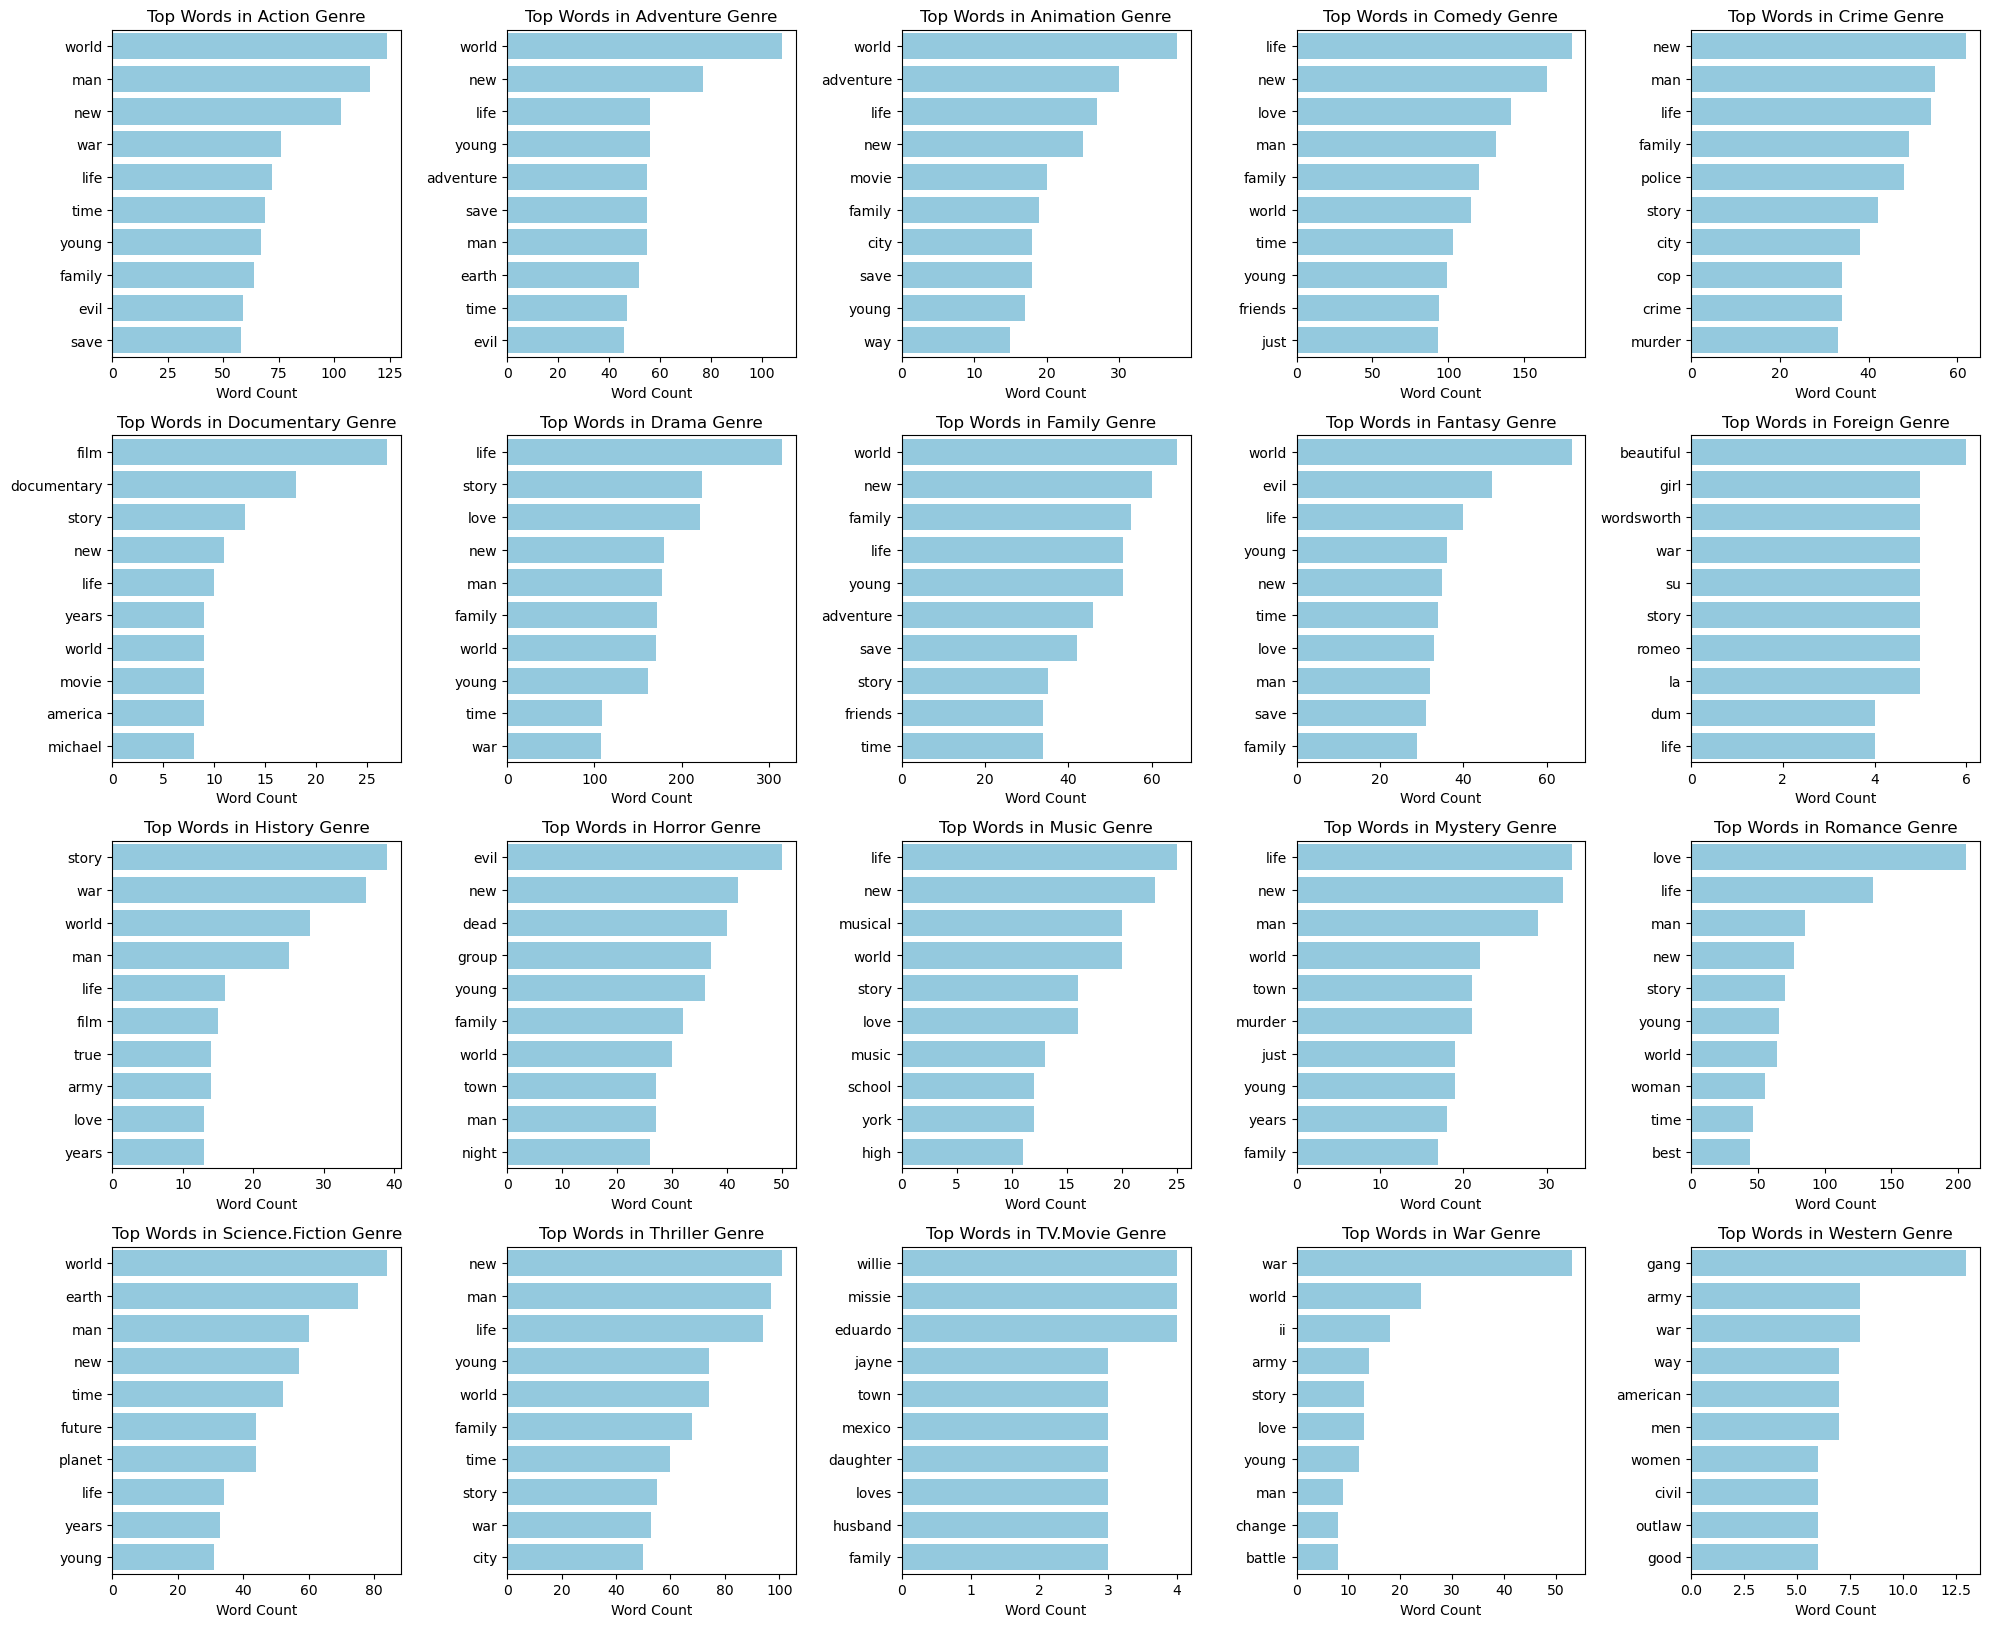

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

# Function to clean and preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    return text

# Create a list of genre columns
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
    'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science.Fiction', 'Thriller', 'TV.Movie',
    'War', 'Western'
]

# Initialize CountVectorizer to tokenize and count words
vectorizer = CountVectorizer(stop_words='english', max_features=50)

# Create a figure to plot word clouds for each genre
plt.figure(figsize=(20, 20))

# Loop through the genres
for i, genre in enumerate(genre_columns):
    # Filter the data to get titles, taglines, and overviews for movies belonging to this genre
    genre_data = df_train[df_train[genre] == 1]
    text_data = genre_data[['title', 'tagline', 'overview']].fillna('')  # Handle missing text

    # Combine title, tagline, and overview into one text column
    combined_text = text_data['title'] + ' ' + text_data['tagline'] + ' ' + text_data['overview']
    combined_text = combined_text.apply(preprocess_text)  # Clean the text

    # Fit the CountVectorizer to the combined text
    word_counts = vectorizer.fit_transform(combined_text)

    # Get the most common words
    words = vectorizer.get_feature_names_out()
    word_count_sum = word_counts.sum(axis=0).A1  # Sum the counts across all documents

    # Create a DataFrame for the word counts
    word_count_df = pd.DataFrame(zip(words, word_count_sum), columns=['word', 'count'])
    word_count_df = word_count_df.sort_values(by='count', ascending=False)

    # Plot the most common words for each genre
    plt.subplot(5, 5, i + 1)  # Create a 5x5 grid of subplots
    sns.barplot(x='count', y='word', data=word_count_df.head(10), color='skyblue')
    plt.title(f"Top Words in {genre} Genre")
    plt.xlabel('Word Count')
    plt.ylabel('')
    plt.tight_layout()

# Show the plots
plt.show()


### CONCLUSIONS:
### This is a high imbalanced dataset.
### Each genre owns their unique words that could be used as features in modelling.